<a href="https://colab.research.google.com/github/TanzimRusho/covid_19_data_viz/blob/main/corona_spread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
glob.glob('/content/drive/My Drive/corona/data/*')

['/content/drive/My Drive/corona/data/time_series_covid_19_confirmed.csv',
 '/content/drive/My Drive/corona/data/COVID19_line_list_data.csv',
 '/content/drive/My Drive/corona/data/covid_19_data.csv']

In [ ]:
import pandas as pd
import operator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
confirmed_df = pd.read_csv('/content/drive/My Drive/corona/data/time_series_covid_19_confirmed.csv')

In [ ]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()
latest_confirmed = confirmed_df[dates[-1]]
unique_countries =  list(confirmed_df['Country/Region'].unique())
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region']==unique_countries[i]].sum()

# number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 80921.0 cases
Italy: 12462.0 cases
Iran: 9000.0 cases
Korea, South: 7755.0 cases
France: 2284.0 cases
Spain: 2277.0 cases
Germany: 1908.0 cases
US: 1281.0 cases
Cruise Ship: 696.0 cases
Switzerland: 652.0 cases
Japan: 639.0 cases
Norway: 598.0 cases
Netherlands: 503.0 cases
Sweden: 500.0 cases
United Kingdom: 459.0 cases
Denmark: 444.0 cases
Belgium: 314.0 cases
Qatar: 262.0 cases
Austria: 246.0 cases
Bahrain: 195.0 cases
Singapore: 178.0 cases
Malaysia: 149.0 cases
Australia: 128.0 cases
Israel: 109.0 cases
Canada: 108.0 cases
Greece: 99.0 cases
Czechia: 91.0 cases
Iceland: 85.0 cases
United Arab Emirates: 74.0 cases
Kuwait: 72.0 cases
Iraq: 71.0 cases
India: 62.0 cases
San Marino: 62.0 cases
Lebanon: 61.0 cases
Egypt: 60.0 cases
Thailand: 59.0 cases
Finland: 59.0 cases
Portugal: 59.0 cases
Slovenia: 57.0 cases
Philippines: 49.0 cases
Taiwan*: 48.0 cases
Romania: 45.0 cases
Ireland: 43.0 cases
Brazil: 38.0 cases
Vietnam: 38.0 cases
Indonesi

In [ ]:
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20'],
      dtype='object')

In [ ]:
china_confirmed = confirmed_df.loc[confirmed_df['Country/Region']=='Mainland China', cols[4]:cols[24]]
italy_confirmed = confirmed_df.loc[confirmed_df['Country/Region']=='Italy', cols[13]:cols[33]] 
iran_confirmed = confirmed_df.loc[confirmed_df['Country/Region']=='Iran (Islamic Republic of)', cols[32]:cols[52]]
spain_confirmed = confirmed_df.loc[confirmed_df['Country/Region']=='Spain', cols[14]:cols[34]]
germany_confirmed = confirmed_df.loc[confirmed_df['Country/Region']=='Germany', cols[9]:cols[29]]
skorea_confirmed = confirmed_df.loc[confirmed_df['Country/Region']=='Republic of Korea', cols[4]:cols[24]]
france_confirmed = confirmed_df.loc[confirmed_df['Country/Region']=='France', cols[6]:cols[26]]
usa_confirmed = confirmed_df.loc[confirmed_df['Country/Region']=='US', cols[4]:cols[24]]

china_dates = china_confirmed.keys()
italy_dates = italy_confirmed.keys()
iran_dates = iran_confirmed.keys()
spain_dates = spain_confirmed.keys()
germany_dates = germany_confirmed.keys()
skorea_dates = skorea_confirmed.keys()
france_dates = france_confirmed.keys()
usa_dates = usa_confirmed.keys()

china_cases = []
italy_cases = []
iran_cases = []
spain_cases = []
germany_cases = []
skorea_cases = []
france_cases = []
usa_cases = []

for i in china_dates:
    china_sum = china_confirmed[i].sum()
    china_cases.append(china_sum)

for i in italy_dates:
    italy_sum = italy_confirmed[i].sum()
    italy_cases.append(italy_sum)

for i in iran_dates:
    iran_sum = iran_confirmed[i].sum()
    iran_cases.append(iran_sum)

for i in spain_dates:
    spain_sum = spain_confirmed[i].sum()
    spain_cases.append(spain_sum)

for i in germany_dates:
    germany_sum = germany_confirmed[i].sum()
    germany_cases.append(germany_sum)

for i in skorea_dates:
    skorea_sum = skorea_confirmed[i].sum()
    skorea_cases.append(skorea_sum)

for i in france_dates:
    france_sum = france_confirmed[i].sum()
    france_cases.append(france_sum)

for i in usa_dates:
    usa_sum = usa_confirmed[i].sum()
    usa_cases.append(usa_sum)

print(china_cases)
print(italy_cases)
print(iran_cases)
print(spain_cases)
print(germany_cases)
print(skorea_cases)
print(france_cases)
print(usa_cases)

[547, 639, 916, 1399, 2062, 2863, 5494, 6070, 8124, 9783, 11871, 16607, 19693, 23680, 27409, 30553, 34075, 36778, 39790, 42306, 44327]
[2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[2, 5, 18, 28, 43, 61, 95, 139, 245, 388, 593, 978, 1501, 2336, 2922, 3513, 4747, 5823, 6566, 7161, 8042]
[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 4, 4, 4, 5, 8, 10, 12, 12, 12, 12, 13, 13, 14, 14, 16, 16, 16, 16, 16, 16]
[1, 1, 2, 2, 3, 4, 4, 4, 4, 11, 12, 15, 15, 16, 19, 23, 24, 24, 25, 27, 28]
[2, 3, 3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 11, 11, 11, 11, 11, 11]
[1, 1, 2, 2, 5, 5, 5, 5, 5, 7, 8, 8, 11, 11, 11, 11, 11, 11, 11, 11, 12]


In [ ]:
china_cases = np.array(china_cases).reshape(-1, 1)
italy_cases = np.array(italy_cases).reshape(-1, 1)
iran_cases = np.array(iran_cases).reshape(-1, 1)
spain_cases = np.array(spain_cases).reshape(-1, 1)
germany_cases = np.array(germany_cases).reshape(-1, 1)
skorea_cases = np.array(skorea_cases).reshape(-1, 1)
france_cases = np.array(france_cases).reshape(-1, 1)
usa_cases = np.array(usa_cases).reshape(-1, 1)

In [ ]:
adjusted_dates = np.array([i for i in range(len(china_dates))]).reshape(-1, 1)

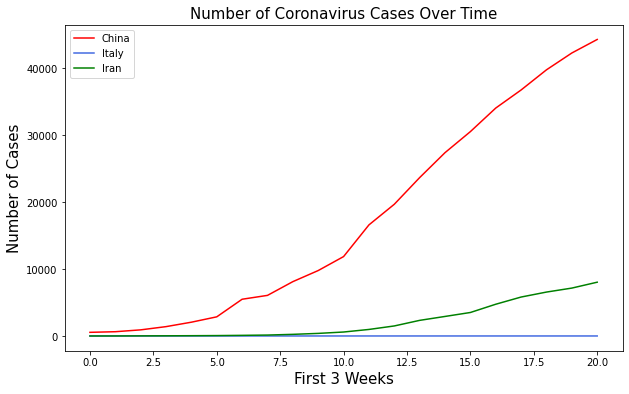

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, china_cases, color='red')
plt.plot(adjusted_dates, italy_cases, color='royalblue')
plt.plot(adjusted_dates, iran_cases, color='green')
plt.title('Number of Coronavirus Cases Over Time', size=15)
plt.xlabel('First 3 Weeks', size=15)
plt.ylabel('Number of Cases', size=15)
plt.xticks(size=10)
plt.legend(['China', 'Italy', 'Iran'])
plt.show()

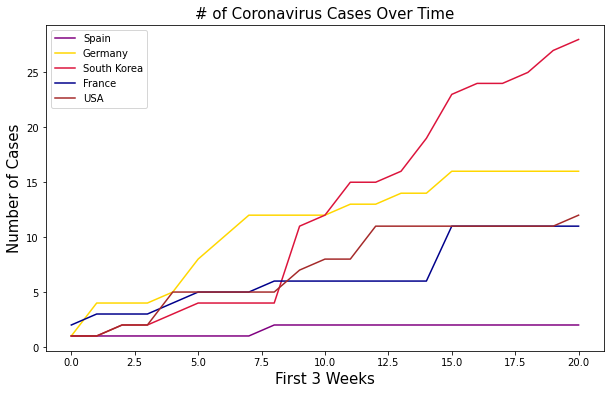

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(adjusted_dates, spain_cases, color='purple')
plt.plot(adjusted_dates, germany_cases, color='gold')
plt.plot(adjusted_dates, skorea_cases, color='crimson')
plt.plot(adjusted_dates, france_cases, color='darkblue')
plt.plot(adjusted_dates, usa_cases, color='brown')
plt.title('Number of Coronavirus Cases Over Time', size=15)
plt.xlabel('First 3 Weeks', size=15)
plt.ylabel('Number of Cases', size=15)
plt.xticks(size=10)
plt.legend(['Spain', 'Germany', 'South Korea', 'France', 'USA'])
plt.show()
